# CSCI2244. Assignment 4
### Due Friday, February 24, 11:59 PM

Problems about discrete random variables and expected value.

__Your name__

In [19]:
import pylab as pl

### 1. Rolling three dice,  four dice and more dice

Let $Y_1,Y_2,Y_3,Y_4$ be  mutually independent random variables each with the uniform distribution on $\{1,\ldots, 6\}.$  Let $Z_3=Y_1+Y_2+Y_3,$ $Z_4=Y_1+Y_2+Y_3+Y_4,$ etc. In other words, $Z_k$ represents the sum of $k$ fair dice.  

### 1.1 Number of ways to roll $n$ with $k$ fair dice

Write a function `numways(n,k)` that returns the number of ways to roll a sum of $n$ with $k$ fair dice.  Recall that if $k=2,$ then $(1,3)$ and $(3,1)$ are two _different_ ways to roll $n=4.$ In general, the function returns
$$|\{(a_1,\ldots,a_k):n=a_1+\cdots+a_k, 1\leq a_i\leq 6\text{ for } i=1\ldots k\}|.$$

HINT:  This problem is well suited to a recursive solution, at least if $n$ is not too large:  For instance, you can find `numways(11,3)` by adding up `numways(11-j,2)` for $j=1,\ldots,6.$

In [13]:
def numways(n,k):
    if n == 0: 
        if k == 0: 
            return 1
        
    if n < 0:
        return 0
    
    if k == 0: 
        return 0 
    
    sum = 0
    for j in range(1,7): 
        sum = sum + numways(n-j,k-1)
    return sum

print(numways(11,3)) 
        

27


### 1.2 PMF of $Z_3$ and $Z_4$

Write a function `plot_pmf(k)` that plots the PMF of $Z_k,$ by calling the function you wrote in 1.1.  Then use this to plot the PMFs of $Z_3$ and $Z_4.$

11
11


16
16


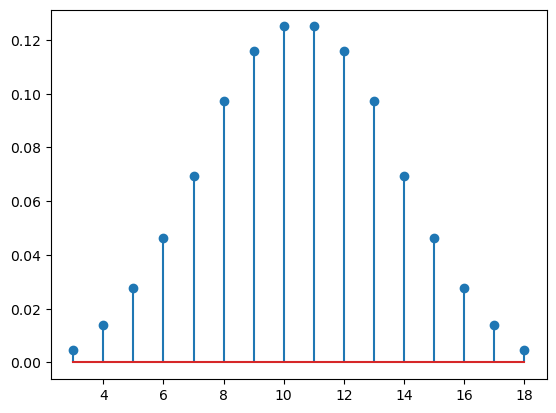

21
21


In [25]:
def plot_pmf(k):
    # create list of total sums 
    n = [x for x in range(k,6*k+1)]
    prob_list = [] 
    for x in n: 
        # get the event of sum with k die 
        ways = numways(x,k)
        prob_list.append(ways/6**k) 
    print(len(n)) 
    print(len(prob_list))
    pl.stem(n,prob_list)
    pl.show()
    
    

plot_pmf(2)
plot_pmf(3)
plot_pmf(4)


### 1.3. Do an efficient simulation using the CDF

You could simulate the sum of $k$ fair dice by 

`sum(pl.choice([1,2,3,4,5,6],k))`

While there's nothing wrong with this, you'll observe that we are generating $k$ different random values each time we need a value of $Z_k.$ There is an alternative approach, using the cumulative distribution function, that requires us to make only a single call to the `random` function to generate a value uniformly distributed between 0 and 1.  This works for _any_ random variable, provided we know the CDF.  For example, the CDF of $Z_2$ assigns values 
$$1/36, 3/36, 6/36,10/36,15/36,21/36,26/36,30/36,33/36,35/36,1$$
to 
$$2,3,\ldots,12.$$

To generate a random value with the same distribution as $Z_2,$ we first call `random` to get a value between 0 and 1, say 0.57.  We then look for the _smallest_ value that is _greater_ than 0.57.  In this case it is $21/36\approx 0.58.$. This corresponds to a roll of 7, which is the value returned.  Observe that 7 will be returned for any value of `random()` between $15/36$ and $21/36,$ and thus with probability $6/36=1/6,$ which is the correct distribution.  The built-in `numpy` function `searchsorted(a,v)` will return the index of the smallest value in a sorted array `a` that is greater than or equal to `v`.  (This method of simulating distributions given the CDF is described in Section 3.3.2 of the Alvarez book.)

Use this method to write a function that returns a list of $m$ random integers in the range from $k$ to $6k$ inclusive with the same distribution as $Z_k.$ 

In [31]:
import numpy as np 
def sim_dice(k,m):
    choose_vals = [x for x in range(m)]
    cdf = [x/k for x in range(6**k)]
    for i in range m: 
        rand_val = np.random.random() 
        closest_val = np.searchsorted(cdf, rand_val) 
        choose_vals[i] = closest_val + k 
    return choose_vals

print(sim_dice(6,10))


SyntaxError: invalid syntax (1609291857.py, line 5)

### 1.4 Compute the expected value, and estimate it with a simulation

Compute the expected value of $Z_k$ (this is very simple!) and then average 10,000 values returned by your function `sim_dice` above for $k=3,4$ and $5.$. You should get very close agreement.

__Your calculation of the expected value of $Z_k$:__ $E(X)=k \times \frac{1+2+3+4+5+6}{6} = 3.5k$

In [26]:
#Run this code and compare to the result above:
for k in [3,4,5]:
    print(k, sum(sim_dice(k,10000)) /10000)

TypeError: 'int' object is not callable

## 2. The Numbers Racket (Poisson distribution)

(This problem was inspired by the book, _The World According to Fannie Davis: My Mother's Life in the Detroit Numbers,_ by Bridget M. Davis.)

The 'numbers game' was an underground lottery that flourished in American cities before the advent of legal state lotteries. In a simplified version, it worked like this: Every day, bettors submitted sequences of 3 digits to the bookmaker, paying one dollar for the bet. The next day, a random 3-digit sequence would be drawn: Often this was done by looking in the horse racing news for the total daily receipts of the local race track, and using the lowest-order three digits of the result. (For instance, if the track took in 236,402 dollars in bets, then the winning sequence would be 402.) Bettors who correctly guessed this result were paid $\$600$ on the dollar.
Let’s look at the problem from the standpoint of a bookmaker who has 800 daily customers. There are 1000 different 3-digit sequences. So we model the day’s bets as 800 random shots fired at a target where the probability of striking the target is one in a thousand. Let $X$ denote the number of winning bets made in a day. Then X has a binomial distribution, but it is well-approximated by a Poisson distribution.

### 2.1 Average daily take

Let $Y$ denote the net daily receipts of the bookmaker.  She takes in $\$800$ and pays out $\$600$ for each winning bet, so

$$Y=800-600X.$$

What is $E(Y)$? Write your answer below.  Be sure to explain what you're doing.

__Your answer:__ $E(X) = np = 800 \times \frac{1}{1000} = \frac{4}{5}$

$E(Y) = 800 - 600 \times \frac{4}{5} = 320$

Find expected value of X, it is binomial disribution so use np formula. The plug this value in to find expected Y.



### 2.2 Probability of negative net receipts

What is the probability that, on a given day, the bookmaker will have to pay out more than she takes in?  In other words, what is $P(Y<0)$?

__Your answer:__

The probability of the bookmaker paying more than she takes in is the probability of X being greater than 1. 
It is the complement of X = 0 and X = 1. 

$1-P(X=0)-P(X=1)$

$P(X=0)=\binom{800}{0} \times \frac{1}{1000}^0 \times \frac{999}{1000}^{800}=.45$

$P(X=1=\binom{800}{1} \times \frac{1}{1000}^1 \times \frac{999}{1000}^{799}=.36$

$1-.45-.36=.19$

### 2.3 Breaking the bank

You should find in 2.2 that a day with negative net receipts is not an unusually rare occurrence.  To guard against this, the bookmaker always makes sure that she has a reserve of $\$3000$ on hand to cover the winning bets.  What is the probability that, on a given day, bettors will 'break the bank', _i.e._, make so many winning bets that she will not be able to cover them all with her reserve funds.

__Your answer:__

The probability of the bettors breaking the bank, winning more than 3800, is the probability of X being greater than 6. So it is the complement of the probability of X = 0, X = 1, X = 2, X = 3, X = 4, X = 5, X = 6. 
$P(X=0)=.45$

$P(X=1)=.36$

$P(X=2)=.14$

$P(X=3)=.04$

$P(X=4)=.008$

$P(X=5)=.001$

$P(X=6)=.0002$

$1-.45-.36-.14-.04-.008-.001-.0002=.0008$
### 2.4 Breaking the bank, continued

Our bookmaker takes bets 365 days a year for 30 years.  What is the probability that during this long career, there will be a day when bettors break the bank?

__Your answer:__

This is the complement of the probability of someone never breaking the bank. Binomial distribution can be used to solve this where n = total days in 30 years = 10950 and p is the probability of someone breaking the bank. 

$1-\binom{10950}{0} \times .0008^0 \times (1-.0008)^{10950}=.99$


## 3. Mutual independence _vs._ pairwise independence

Consider two ordinary 6-faced dice.  Define the following random variables:

$$X_1=\text{ value on first die}$$
$$X_2=\text{ value on second die}$$
$$Y=(X_1+X_2)\bmod 6.$$

We already know that $X_1$ and $X_2$ are independent.  What about $X_1$ and $Y$? What about $X_2$ and $Y$? Are $X_1,X_2,Y$ mutually independent?

Justify all your answers carefully:  If you are claiming independence, you have to prove that the definition holds for all possible outcomes (but that does not mean listing all the outcomes!); if you are claiming non-independence, it is sufficient to show a single counterexample.

__Your answer:__ These random variables are pairwise indenpendant: 

$P(X_1 \land X_1)= \frac{1}{36} = \frac{1}{6} \times \frac{1}{6}$

$P(X_1 \land Y) = \frac{1}{36} = \frac{1}{6} \times \frac{6}{36}$

$P(X_2 \land X_1) = \frac{1}{36}= \frac{1}{6} \times \frac{6}{36}$ 

These random variables are not mutually independant: 

$P(X_1 = 1 \land X_2 = 1 \land Y = 3) = 0 \neq \frac{1}{6} \times \frac{1}{6} \times \frac{6}{36} = \frac{1}{216}$

## 4. You're not the only fish in the sea

Fifty trout are caught from a lake, tagged, and then released back into the lake.  A short while later, 200 trout are caught from the same lake, and it is found that 8 of them have tags.  Estimate the total number of trout in the lake.  (Assume that the two captures represent random samples of the lake's population, and that the total number of trout does not change between the two catches.)

HINT:  Use the hypergeometric distribution where the tagged trout are the '$K$ black balls' and the total number $N$ of balls is unknown. Find the value of $N$ that assigns the highest probability to drawing 8 black balls.  You need to both describe your analysis, and write a little bit of code to find the result.

In [10]:
import math 
import numpy as np 

probability = []
for N in range(200,3000):
    p_val = (math.comb(50,8)*math.comb(N-50,200-8))/math.comb(N,200)
    probability.append(p_val)

pl.plot(np.arange(200,3000),probability)

In [11]:
max = 0
for i in probability:
    if i > max: 
        max = i
print(probability.index(max)+200) 

1249


Using the hypergeometric equation with K set to 50 for the tagged fish, n set to 200 of the fish sampled, k set to the 8 fish that were caught and already tagged, I looped through a range of values from 200 to 3000 and created a list of the probabilities. Plotting these probabilies on the graph I found the max to be between 1000 and 1500 fish in the pond. To get the exact answer I looped through the list, found the max, and retrived its index. 